# Author - Saurabh Shinde

# Task 2 - Prediction using Unsupervised Machine Learning

# GRIP @ The Spark Foundation

For this task i am apply Unsupervised learning algorithm i.e K-Means Algorithm

Here i import some libraries which required for execution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Here i am read the Iris dataset using pandas library

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here i am check which feature having  which datatype using info method , for changing object datatype into other datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Here i am check for categorical values from the Species feature

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

For categorical values we have to convert them into numerical values for that we can apply LabelEncoding method and map function
here i am map function for manullay i can convert into numerical labels

In [5]:
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

Here i am again check after applying map function on Species column to check datatype is changed or not and datatype is changed
from object to int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


Here i am Using isnull function check the null values .

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

By using describe method i get some relation of dataset which is useful in statistical analysis

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


here i am check the relation between the features using corr() method

In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


Generally pairplot is used for visuliuzation part along with that we can understand clearly the pattern of dataset

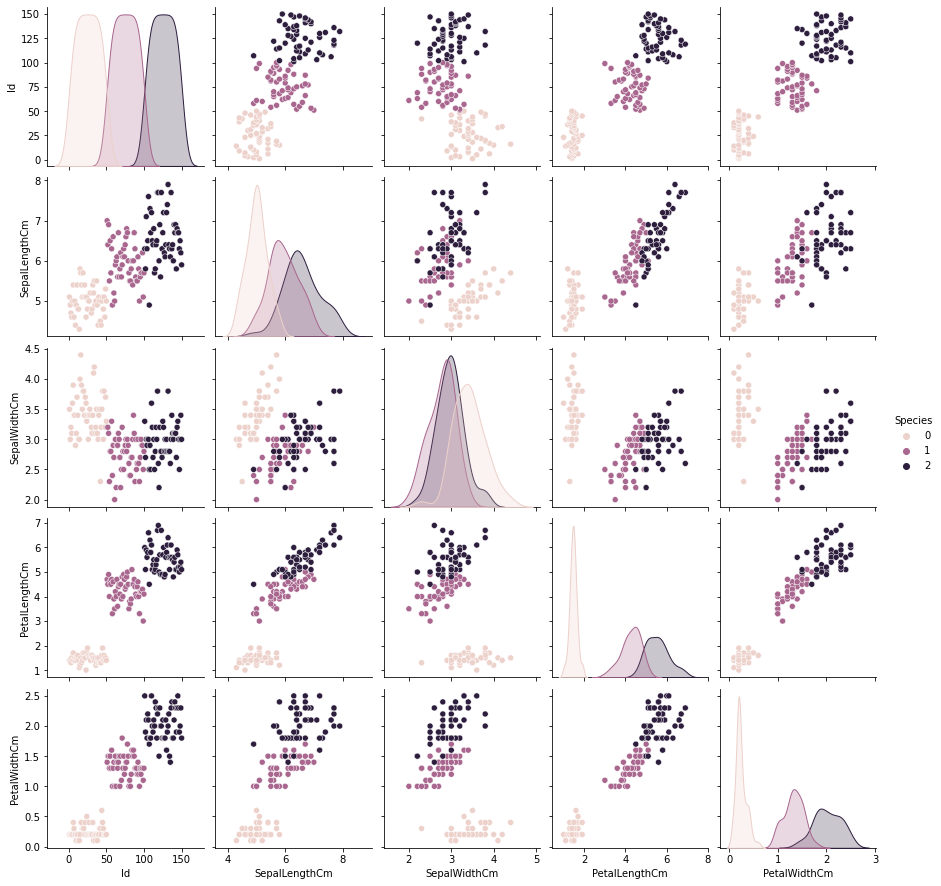

In [10]:
sns.pairplot(df,hue='Species')

here i am plot scatter plot using scatterplot method to see how data is spread

<AxesSubplot:>

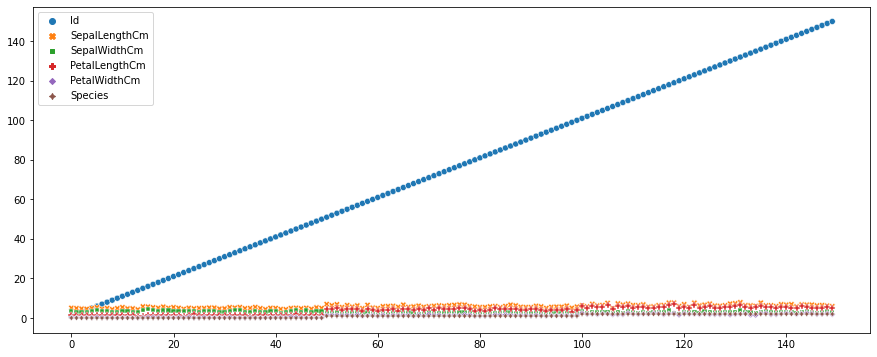

In [11]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df)

By using Boxplot method we can analyse about the Outliers.

<AxesSubplot:>

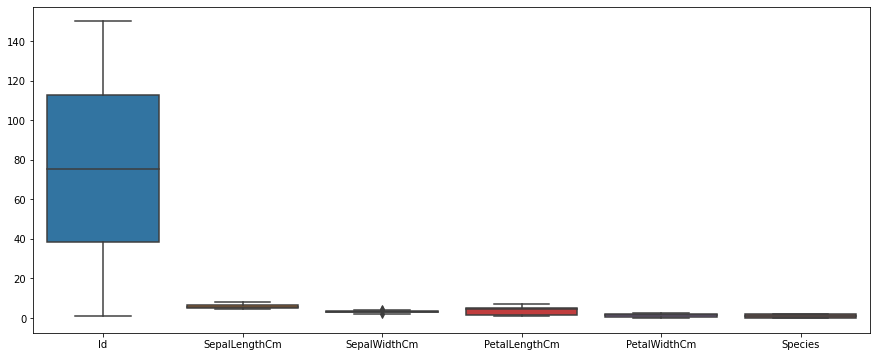

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

By using distplot we can understand the variation of the data

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

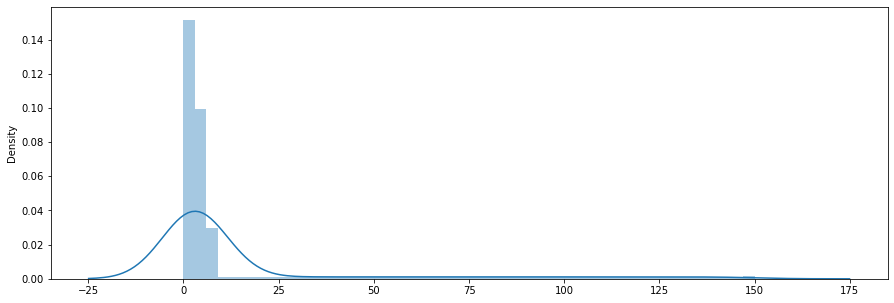

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(df)

Histogram show the summary of discrete or continous data and here we get the summary of dataset

<AxesSubplot:ylabel='Count'>

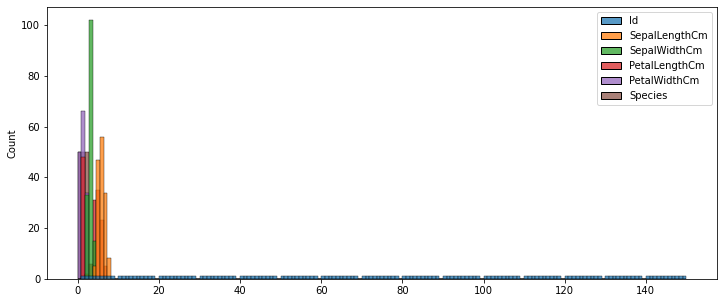

In [14]:
plt.figure(figsize=(12,5))
sns.histplot(df)

here i am copy all dataset in x

In [15]:
x=df



# Elbow Method to find the cluster

In [16]:
k=[1,2,3,4,5,6,7,8,9]
ssd=[]       # sum of squared distance
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)

Text(0, 0.5, 'ssd Sum of Squared distance')

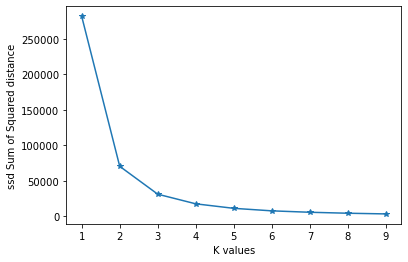

In [17]:
plt.plot(k,ssd,marker='*')
plt.xticks(k)
plt.xlabel('K values')
plt.ylabel('ssd Sum of Squared distance')

# here i am select k=4 

In [18]:
model=KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(x)
y_kmeans=model.predict(x)
print(model.inertia_)
print(model.labels_)

17800.405256045524
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Here i define variables for labels and centroid for storing the data

In [19]:
labels = model.labels_
centroid = model.cluster_centers_

In [20]:
x=np.array(x)

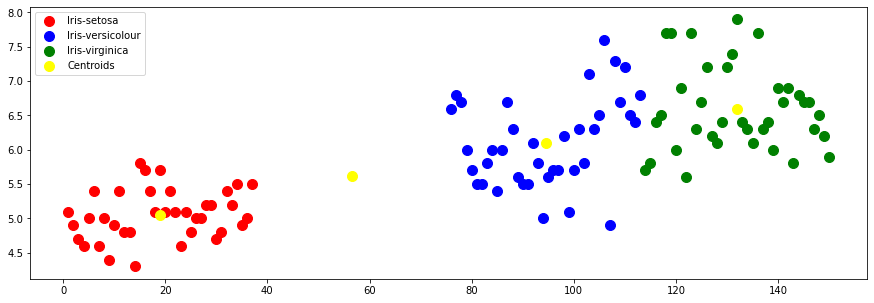

In [21]:
plt.figure(figsize=(15,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Conclusion :

# I am successfully completed the task which is predict the optimum number of clusters and represent it visually using Unsupervised learning. Here we can see yello dot is represent the centroid, red color dotted represnt the 'Iris-setosa' feature , blue dot represents the 'Iris-versicolour' and green dot represents the 'Iris-virginica'.